# Circularity

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from auriga.images import add_redshift, figure_setup
from auriga.paths import Paths
from auriga.parser import parse

In [5]:
figure_setup()

In [7]:
def plot_ref_pot_for_galaxies(simulations: list):
    """
    Plot the reference potential for a list of simulations.

    Parameters
    ----------
    simulations : list
        A list of simulations.
    """    

    fig = plt.figure(figsize=(2.0, 2.0))
    gs = fig.add_gridspec(nrows=1, ncols=1, hspace=0.0, wspace=0.0)
    ax = gs.subplots(sharex=True, sharey=True)

    ax.label_outer()
    ax.grid(True, ls='-', lw=0.25, c='silver')
    ax.tick_params(which='both', direction="in")
    ax.set_xlim(0, 14)
    # ax.set_ylim(-0.5, 5.5)
    ax.set_xticks([2, 4, 6, 8, 10, 12, 14])
    # ax.set_yticks([0, 1, 2, 3, 4, 5])
    ax.set_xlabel('Time [Gyr]')
    ax.set_ylabel(
        '$V_\mathrm{ref}$ [$10^5 \, ( \mathrm{km} / \mathrm{s} )^2$]')

    for simulation in simulations:
        galaxy, rerun, resolution = parse(simulation=simulation)
        paths = Paths(galaxy, rerun, resolution)
        df = pd.read_csv(f"../{paths.results}temporal_data.csv")
        ax.plot(df["Time_Gyr"], df["ReferencePotential_(km/s)^2"] / 1E5,
                lw=1.0, zorder=11,
                label=r"$\texttt{" + f"au{galaxy}_or_l4".upper() + "}$", )

    ax.legend(loc='upper right', ncol=1, framealpha=0, fontsize=6.0)

    add_redshift(ax)


    plt.show()

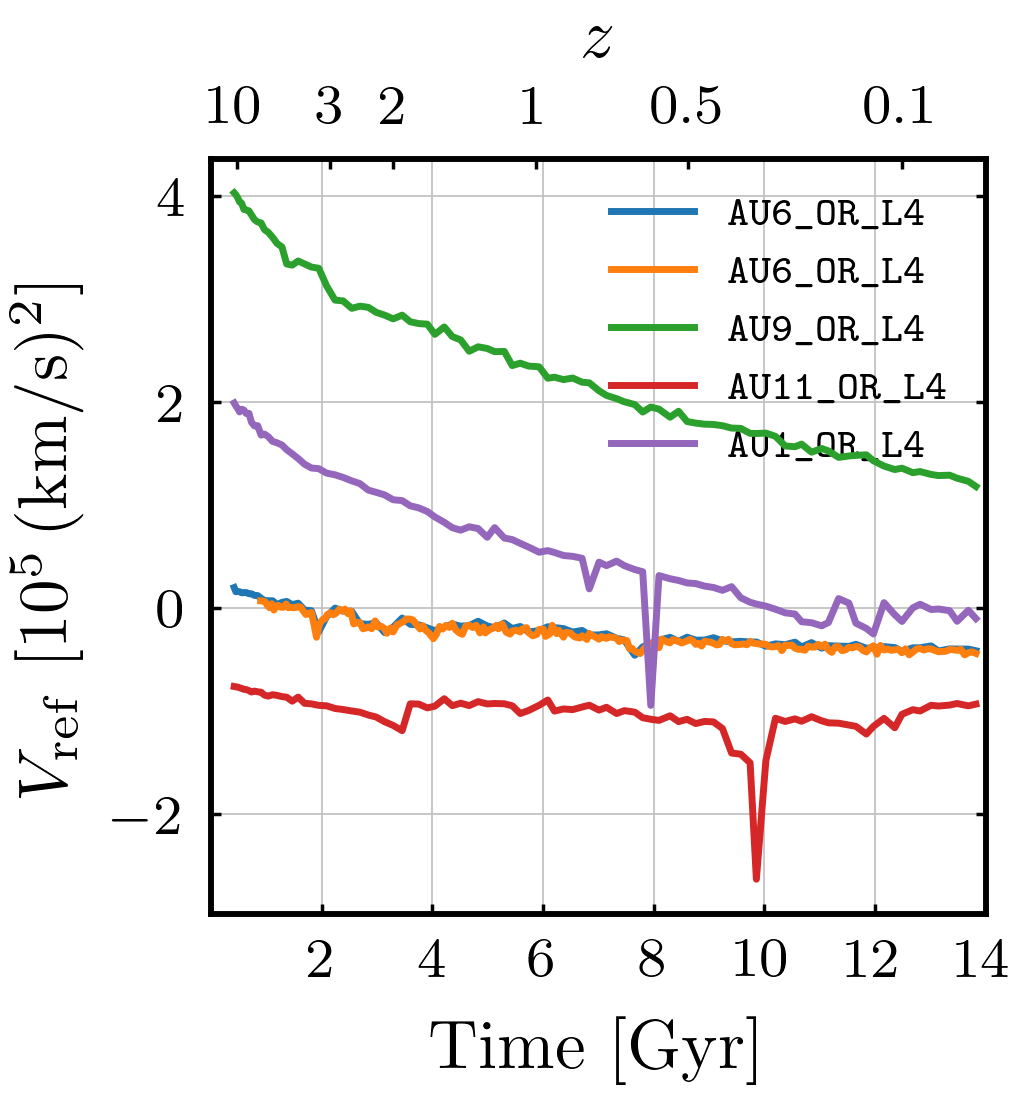

In [8]:
plot_ref_pot_for_galaxies(simulations=["au6_or_l4",
                                       "au6_re_l4",
                                       "au9_or_l4",
                                       "au11_or_l4",
                                       "au1_or_l4"])